{'Dry_Neem', 'Dry_Tulsi', 'Fresh_Pudina', 'Fresh_Neem', 'Very_Dry_Pudina', 'Fresh_Tulsi', 'Dry_Pudina'}
Accuracy for RF is: 66.90647482014388
Confusion Matrix:
[[54  0  4  7  1  2  0]
 [ 1 28  8  2  2 10  0]
 [ 6 13 55  0  2  5  0]
 [18  0  0 45  1  3  1]
 [ 5  0  0  0 25  9  0]
 [ 6 11  9  4  7 39  0]
 [ 0  0  1  0  0  0 33]]


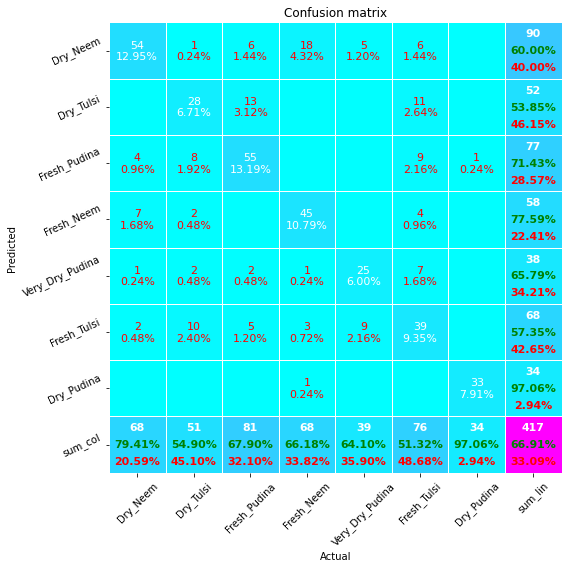

[0.86811352 0.89816361 0.90651085]
Avg : 0.890929326655537


In [3]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import pickle 
from pretty_confusion_matrix import pp_matrix
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Importing the dataset from the sklearn library into a local variable called dataset
df = pd.read_excel("train.xlsx")

# Extract the hyperspectral data (excluding the last column) and labels (last column)
hyperspectral_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values
print(set(labels))

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X = hyperspectral_data
Y = encoded_labels

digits = load_digits()

# Splitting the data test into train 70% and test 30%.
# x_train, y_train are training data and labels respectively 
# x_test, y_test are testing data and labels respectively 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)  

classifier = RandomForestClassifier(n_estimators = 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

#Predicting the test set result  
y_pred = classifier.predict(x_test)   

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for RF is:",accuracy)
print("Confusion Matrix:")
print(confusion_mat)

# Save the trained classifier for future use
pickle.dump(classifier, open("cls.sav", "wb"))

# Beautiful Confusion Matrix
df_cm = pd.DataFrame(confusion_mat, index=list(set(labels)), columns=list(set(labels)))
cmap = 'cool'
pp_matrix(df_cm, cmap=cmap)

#k-fold cross validation (k = 3)
score_rf=cross_val_score(RandomForestClassifier(n_estimators=10),digits.data, digits.target,cv=3)
print(score_rf)
print("Avg :",np.average(score_rf))

In [2]:
# Decode the predicted labels
decoded_pred_labels = label_encoder.inverse_transform(y_pred)
decoded_actual_labels = label_encoder.inverse_transform(y_test)
print('No of actual entries: ',len(decoded_actual_labels))
print('No of predicted entries: ', len(decoded_pred_labels))
# Display the predicted and actual labels
print("Predicted Labels:")
print(decoded_pred_labels)
print("Actual Labels:")
print(decoded_actual_labels)

No of actual entries:  417
No of predicted entries:  417
Predicted Labels:
['Dry_Pudina' 'Fresh_Neem' 'Fresh_Neem' 'Dry_Pudina' 'Very_Dry_Pudina'
 'Dry_Neem' 'Fresh_Tulsi' 'Dry_Neem' 'Fresh_Tulsi' 'Fresh_Pudina'
 'Very_Dry_Pudina' 'Dry_Pudina' 'Fresh_Tulsi' 'Fresh_Neem' 'Dry_Neem'
 'Fresh_Tulsi' 'Dry_Pudina' 'Dry_Pudina' 'Dry_Tulsi' 'Dry_Tulsi'
 'Dry_Neem' 'Dry_Pudina' 'Fresh_Tulsi' 'Dry_Tulsi' 'Dry_Tulsi' 'Dry_Neem'
 'Dry_Tulsi' 'Dry_Tulsi' 'Fresh_Neem' 'Dry_Tulsi' 'Dry_Pudina'
 'Very_Dry_Pudina' 'Fresh_Tulsi' 'Fresh_Pudina' 'Fresh_Neem' 'Fresh_Neem'
 'Dry_Tulsi' 'Dry_Tulsi' 'Fresh_Pudina' 'Dry_Neem' 'Fresh_Tulsi'
 'Fresh_Neem' 'Fresh_Neem' 'Fresh_Neem' 'Dry_Neem' 'Fresh_Tulsi'
 'Very_Dry_Pudina' 'Fresh_Tulsi' 'Fresh_Pudina' 'Dry_Tulsi' 'Dry_Tulsi'
 'Very_Dry_Pudina' 'Dry_Pudina' 'Fresh_Pudina' 'Dry_Tulsi' 'Fresh_Tulsi'
 'Dry_Neem' 'Fresh_Tulsi' 'Dry_Neem' 'Very_Dry_Pudina' 'Dry_Tulsi'
 'Dry_Tulsi' 'Dry_Neem' 'Fresh_Tulsi' 'Very_Dry_Pudina' 'Dry_Pudina'
 'Fresh_Neem' 'Very_Dry_Pudina'